# Assignment : Clustering

## Theoriticl Questions


#### Question 1: What is unsupervised learning in the context of machine learning?

#### Answer 1:
 Unsupervised learning involves training algorithms on data without labeled outputs. The goal is to find hidden patterns, groupings, or structures—common tasks include clustering and dimensionality reduction.

------------------------------------------------

#### Question 2: How does K-Means clustering algorithm work?

#### Answer 2:
 Initialize k centroids.
 Assign each point to the nearest centroid.
 Recalculate centroids as the mean of assigned points.
 Repeat steps 2–3 until centroids stabilize.

-----------------------------------------------

#### Question 3: Explain the concept of a dendrogram in hierarchical clustering

#### ANswer 3:
 A dendrogram is a tree-like diagram showing how clusters are merged or split in hierarchical clustering. The height of each merge indicates the distance between the merged clusters.

----------------------------------------------------

#### Question 4: What is the main difference between K-Means and Hierarchical Clustering?

#### Answer 4:
 K-Means: Requires a predefined number of clusters (k) and uses centroid-based partitioning.

 Hierarchical: Builds a tree of clusters; no need to predefine k.

------------------------------------------------

#### Question 5: What are the advantages of DBSCAN over K-Means?

#### Answer 5:
 Handles arbitrary shapes
 No need to specify number of clusters
 Can identify noise/outliers
 Works better on uneven densities

----------------------------------------------------------

#### Question 6:  When would you use Silhouette Score in clustering?

#### Answer 6:
 To evaluate clustering quality by measuring how similar an object is to its own cluster vs. other clusters. Useful for choosing the optimal number of clusters.

---------------------------------------------------------

#### Question 7:What are the limitations of Hierarchical Clustering?

#### Answer 7:
 Not scalable for large datasets
 Irreversible merges/splits
 Sensitive to noisy data and outliers

-------------------------------------------

#### Question 8: Why is feature scaling important in clustering algorithms like K-Means?

#### Answer 8:
 Because K-Means uses distance measures (e.g., Euclidean), unscaled features can bias the clustering outcome toward high-magnitude features.

----------------------------------------------------

#### Question 9 : How does DBSCAN identify noise points?

#### Answer 9 :
 Points not belonging to any cluster (i.e., not in any core or reachable region) are labeled as noise or outliers.

-------------------------------------------------

#### Question 10: Define inertia in the context of K-Means

#### Answer 10:
 Inertia is the sum of squared distances between each data point and its assigned cluster’s centroid. Lower inertia means tighter clusters.

------------------------------------------------------

#### Question 11: What is the elbow method in K-Means clustering?

#### Answer 11:
 A technique to determine the optimal k by plotting inertia vs. number of clusters. The "elbow point" suggests the best balance between complexity and performance.

--------------------------------------------------

#### Question 12: Describe the concept of "density" in DBSCAN

#### Answer 12:
 Density is defined by the number of points within a neighborhood radius (eps). A point is a core point if its neighborhood contains at least min_samples points.

---------------------------------------------------

#### Question 13: Can hierarchical clustering be used on categorical data?

#### Answer 13: Yes, but you must use appropriate distance metrics (e.g., Hamming distance) or convert categorical data using one-hot encoding or similar techniques.

-------------------------------------------------------

#### Question 14: What does a negative Silhouette Score indicate?

#### Answer 14: A negative score means a point is closer to a neighboring cluster than to its own—indicating poor clustering or misclassification.


---------------------------------------------------------

#### Question 15: Explain the term "linkage criteria" in hierarchical clustering

#### Answer 15:
 Linkage criteria define how the distance between clusters is calculated. Common types:
     Single (min)
     Complete (max)
     Average
     Ward's

-------------------------------------------------

#### Question 16: Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

#### Answer 16:
  Because it assumes:
     Clusters are spherical
     Similar size and density
     It struggles with irregular shapes or unbalanced groups.

---------------------------------------

#### Question 17: What are the core parameters in DBSCAN, and how do they influence clustering?

#### Answer 17:
  eps: Radius around a point
  min_samples: Minimum points required to form a dense region
  Larger eps → fewer clusters; higher min_samples → tighter clusters


------------------------------------------------------------

#### Question 18: How does K-Means++ improve upon standard K-Means initialization?

#### Answer 18:
 It selects initial centroids smartly, spreading them out to reduce the chances of poor convergence and improve clustering quality.



#### Question 19: What is agglomerative clustering?

#### Answer 19:
 A bottom-up hierarchical approach where each point starts as its own cluster, and pairs of clusters are recursively merged based on linkage criteria.

-------------------------------------------------

#### Question 20: What makes Silhouette Score a better metric than just inertia for model evaluation?

#### Answer 20:
  Inertia only decreases as you add clusters, but Silhouette Score balances intra-cluster compactness and inter-cluster separation, making it more informative for model selection.

-----------------------------------------------

## Practicle Questions

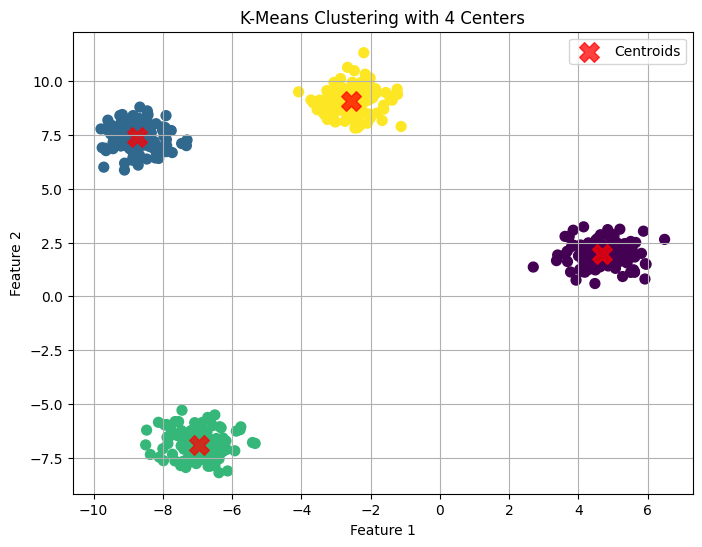

In [1]:
## Question 21: Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data with 4 centers
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title('K-Means Clustering with 4 Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()





In [2]:
## Question 22:   Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 2: Apply Agglomerative Clustering with 3 clusters
agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(X)

# Step 3: Display the first 10 predicted labels
print("First 10 predicted cluster labels:", labels[:10])


First 10 predicted cluster labels: [1 1 1 1 1 1 1 1 1 1]


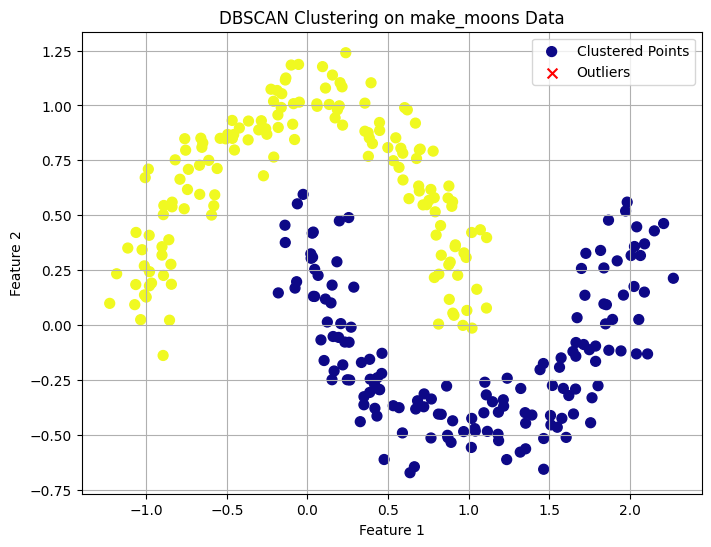

In [3]:
## Question 23:Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Step 1: Generate synthetic two-moon data
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Plot clusters and highlight outliers
plt.figure(figsize=(8, 6))

# Core and border points
plt.scatter(X[labels != -1, 0], X[labels != -1, 1], 
            c=labels[labels != -1], cmap='plasma', s=50, label='Clustered Points')

# Outliers
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], 
            c='red', s=50, marker='x', label='Outliers')

plt.title("DBSCAN Clustering on make_moons Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()



In [4]:
## Question 24: Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means clustering (choose 3 clusters as wine has 3 classes)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Step 4: Print the size of each cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:")
for cluster_id, count in zip(unique, counts):
    print(f"Cluster {cluster_id}: {count} samples")



Cluster sizes:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


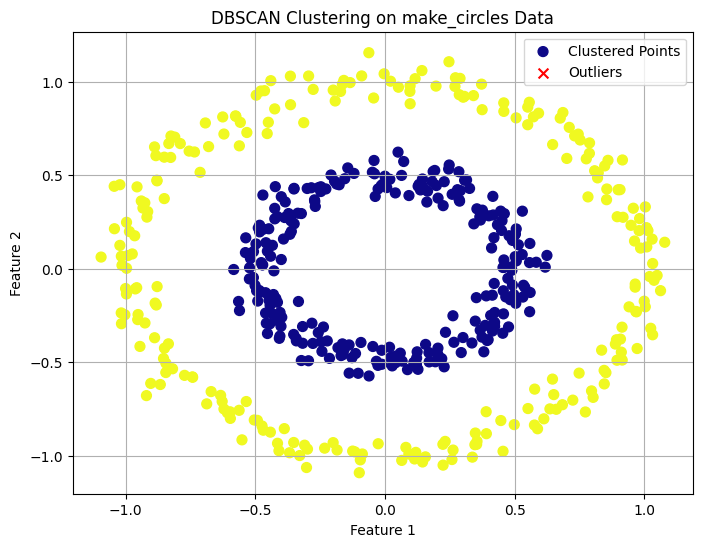

In [5]:
## Question 25: Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# Step 1: Generate synthetic circular data
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Plot the result
plt.figure(figsize=(8, 6))

# Plot clustered points
plt.scatter(X[labels != -1, 0], X[labels != -1, 1],
            c=labels[labels != -1], cmap='plasma', s=50, label='Clustered Points')

# Plot outliers
plt.scatter(X[labels == -1, 0], X[labels == -1, 1],
            c='red', s=50, marker='x', label='Outliers')

plt.title("DBSCAN Clustering on make_circles Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
## Question 26:  Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids 

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Step 2: Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Step 4: Output the cluster centroids
print("Cluster Centroids (after MinMax scaling):")
print(kmeans.cluster_centers_)


Cluster Centroids (after MinMax scaling):
[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


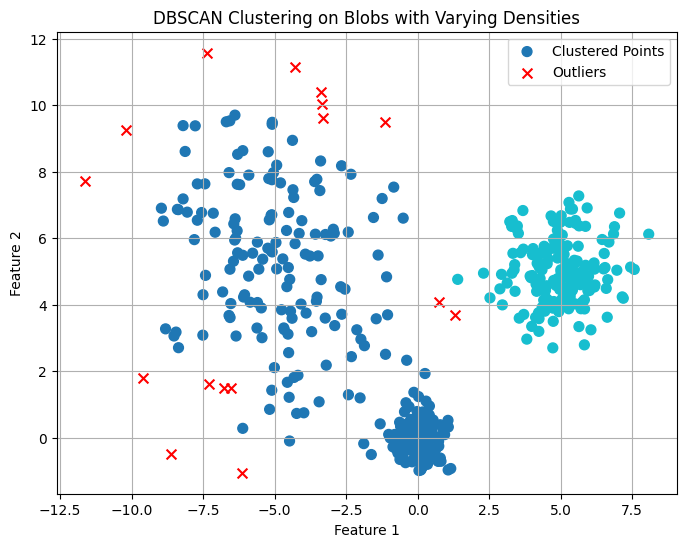

In [7]:
## Question 27:  Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN


import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Step 1: Generate synthetic data with varying cluster std deviations
X, y = make_blobs(n_samples=500,
                  centers=[[0, 0], [5, 5], [-5, 5]],
                  cluster_std=[0.5, 1.0, 2.5],
                  random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Plot the results
plt.figure(figsize=(8, 6))

# Plot clustered points
plt.scatter(X[labels != -1, 0], X[labels != -1, 1],
            c=labels[labels != -1], cmap='tab10', s=50, label='Clustered Points')

# Plot outliers
plt.scatter(X[labels == -1, 0], X[labels == -1, 1],
            c='red', s=50, marker='x', label='Outliers')

plt.title("DBSCAN Clustering on Blobs with Varying Densities")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


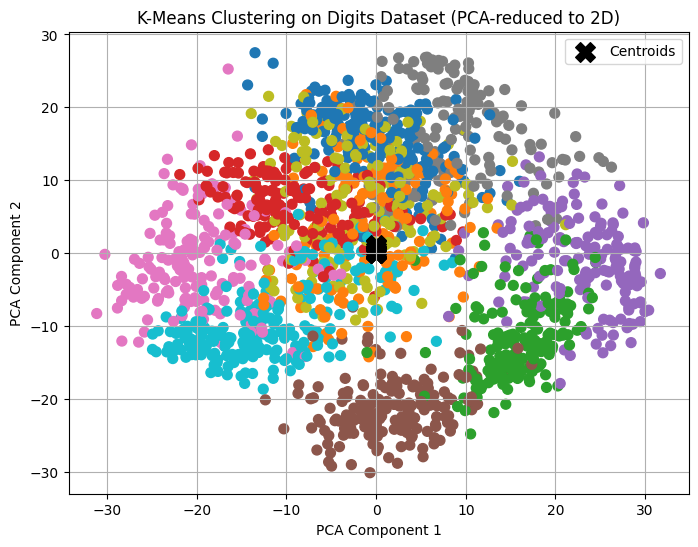

In [8]:
## Question 28:Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target  # (optional: true labels)

# Step 2: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Apply K-Means clustering (10 digits → 10 clusters)
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X)

# Step 4: Plot the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', s=200, marker='X', label='Centroids')

plt.title("K-Means Clustering on Digits Dataset (PCA-reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()



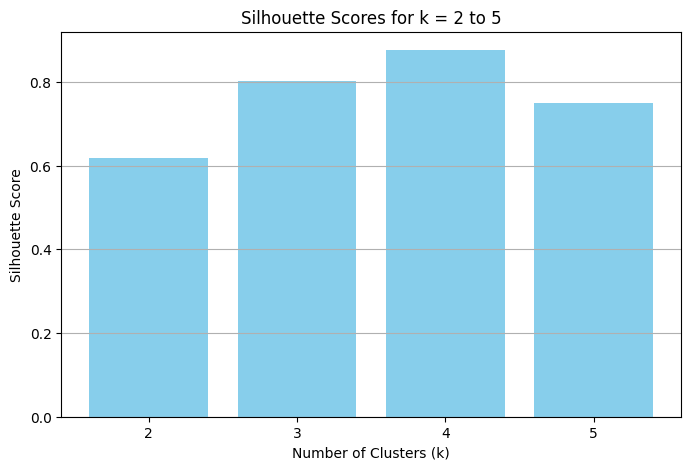

In [9]:
## Question 29: Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart


import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Evaluate silhouette scores for k = 2 to 5
silhouette_scores = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Step 3: Display silhouette scores as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for k = 2 to 5')
plt.xticks(k_values)
plt.grid(axis='y')
plt.show()


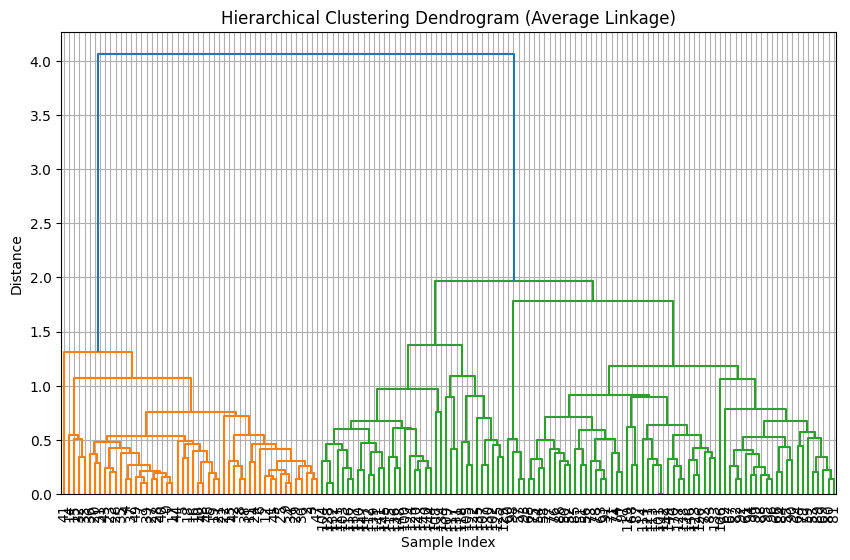

In [10]:
## Question 30:Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 2: Compute linkage matrix using 'average' linkage
linkage_matrix = linkage(X, method='average')

# Step 3: Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix,
           truncate_mode=None,
           p=30,
           leaf_rotation=90,
           leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


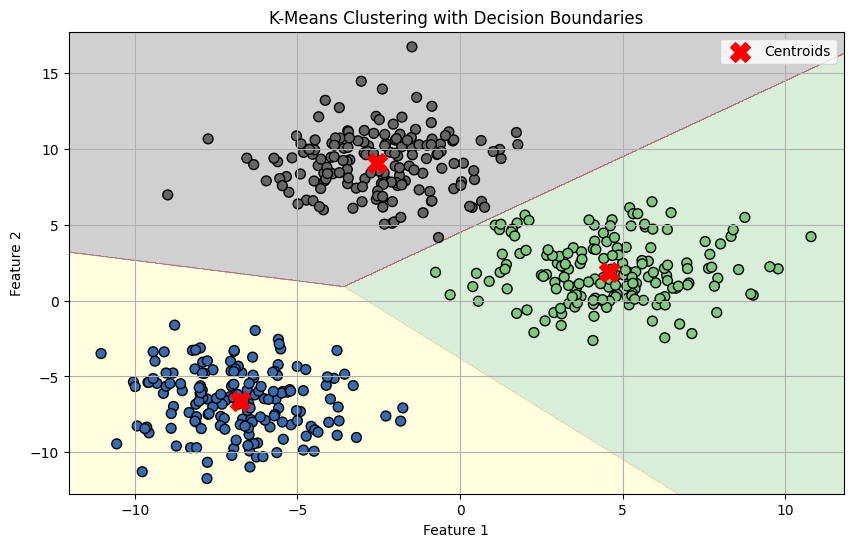

In [11]:
## Question 31: Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data with overlapping clusters
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=2.0, random_state=42)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

# Step 3: Create a meshgrid for decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                     np.linspace(y_min, y_max, 1000))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = kmeans.predict(grid)
Z = Z.reshape(xx.shape)

# Step 4: Plot decision boundaries and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Accent')
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', s=50, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering with Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


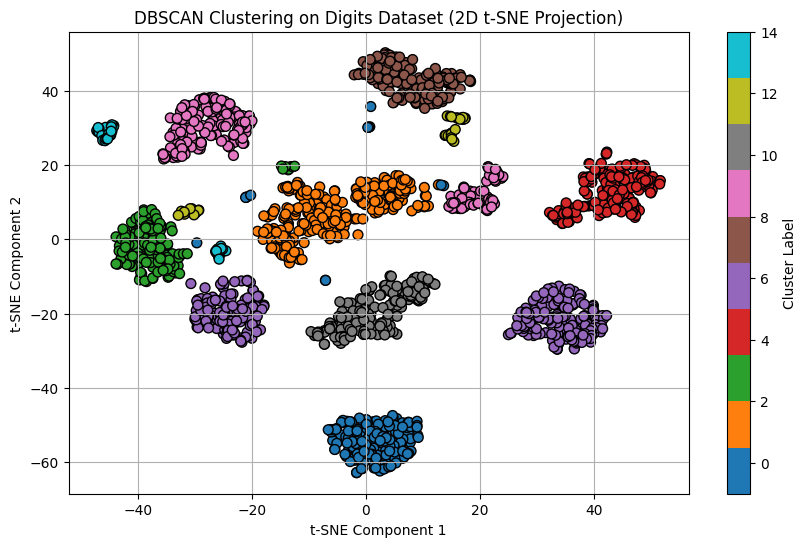

In [12]:
## Question 32:  Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data

# Step 2: Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Step 4: Visualize the results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=50, edgecolor='k')
plt.title("DBSCAN Clustering on Digits Dataset (2D t-SNE Projection)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.colorbar(scatter, label='Cluster Label')
plt.show()


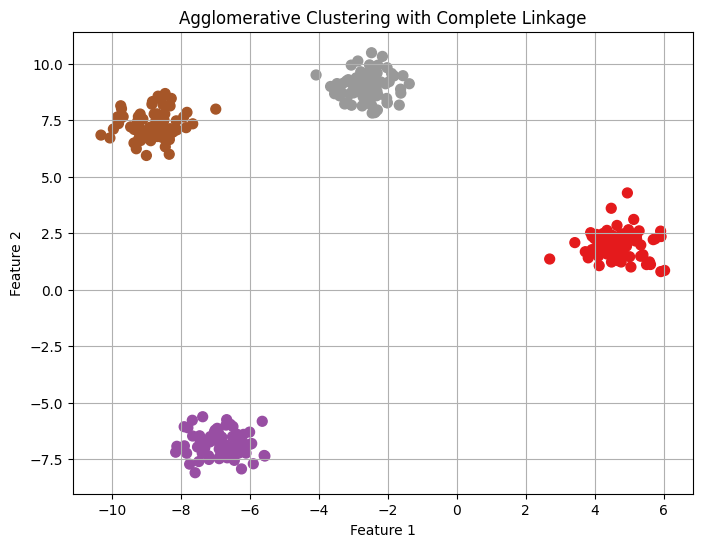

In [13]:
## Question33:  Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result
 

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply Agglomerative Clustering with 'complete' linkage
agglo = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agglo.fit_predict(X)

# Step 3: Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', s=50)
plt.title("Agglomerative Clustering with Complete Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

 

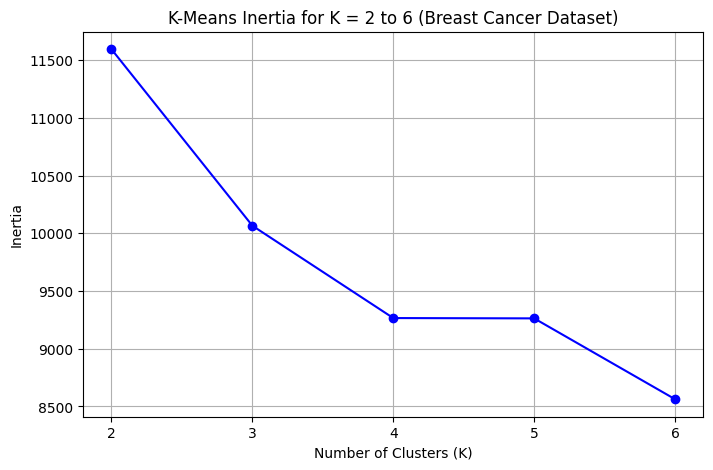

In [14]:
## Question 34: Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Compute inertia for K = 2 to 6
k_values = range(2, 7)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Step 4: Plot inertia values
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('K-Means Inertia for K = 2 to 6 (Breast Cancer Dataset)')
plt.xticks(k_values)
plt.grid(True)
plt.show()



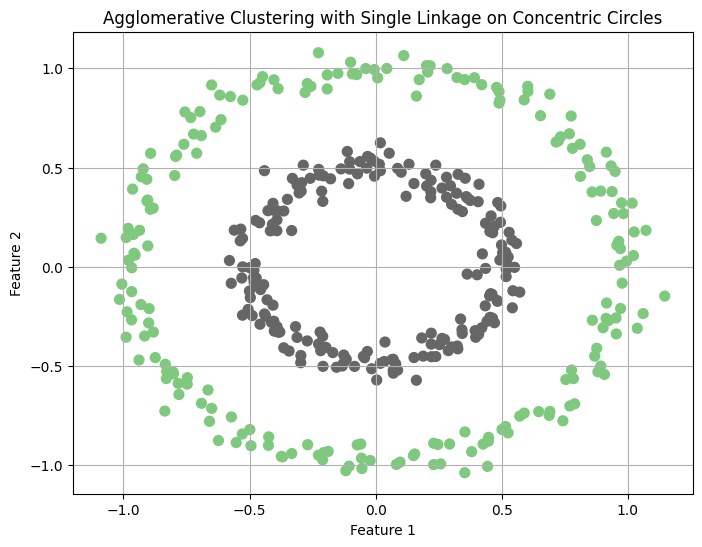

In [15]:
## Question 35: Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic concentric circles
X, y_true = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

# Step 2: Apply Agglomerative Clustering with 'single' linkage
agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agglo.fit_predict(X)

# Step 3: Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', s=50)
plt.title("Agglomerative Clustering with Single Linkage on Concentric Circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [16]:
## Question 36: Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Wine dataset
data = load_wine()
X = data.data

# Step 2: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count number of clusters (excluding noise, which is labeled -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


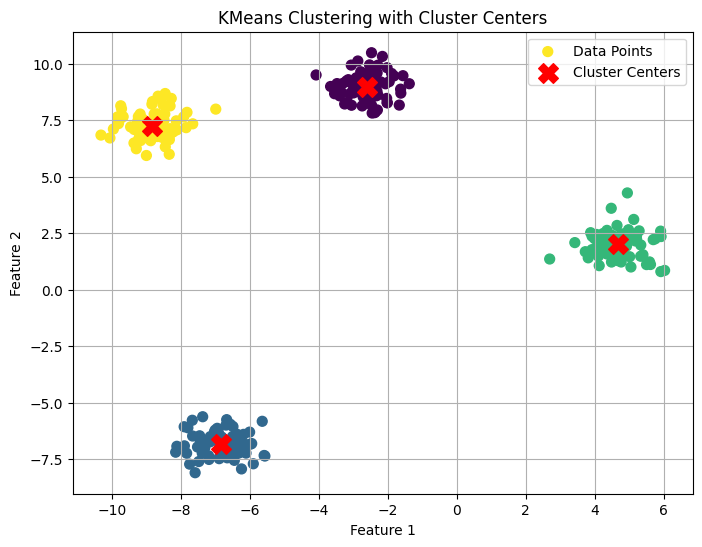

In [17]:
## Question 37:  Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Step 3: Plot data points and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title("KMeans Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
## Question 38: Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count noise points (labeled as -1)
n_noise = np.sum(labels == -1)

print("Number of noise samples identified by DBSCAN:", n_noise)


Number of noise samples identified by DBSCAN: 26


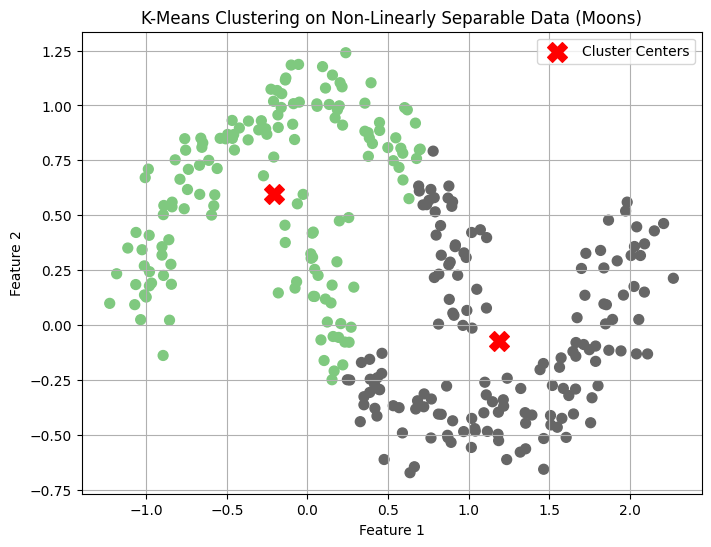

In [19]:
## Question 39: Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# Step 1: Generate synthetic non-linear data (moons)
X, y_true = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 2: Apply KMeans clustering (try 2 clusters since there are two moons)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Step 3: Visualize clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Cluster Centers')
plt.title("K-Means Clustering on Non-Linearly Separable Data (Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


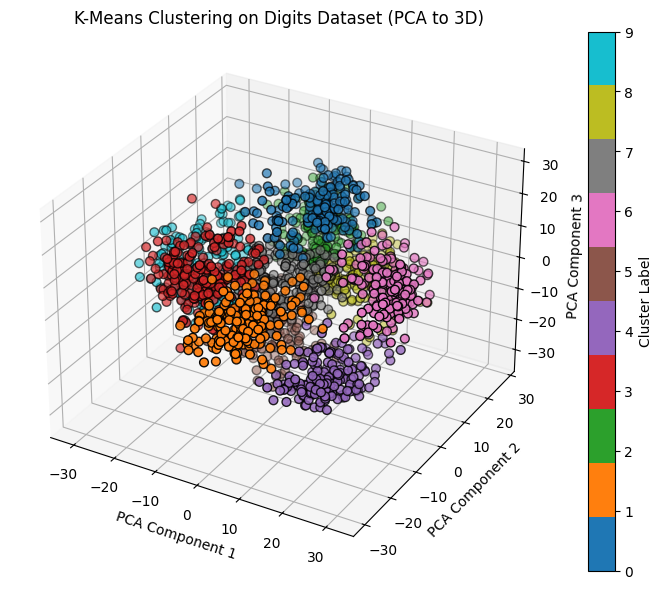

In [20]:
## Question 40: Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data

# Step 2: Reduce to 3D using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Step 3: Apply KMeans clustering (digits 0–9 → 10 clusters)
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Step 4: 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=labels, cmap='tab10', s=40, edgecolor='k')

ax.set_title("K-Means Clustering on Digits Dataset (PCA to 3D)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.colorbar(scatter, label='Cluster Label')
plt.show()


In [21]:
## Question 41: Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic data with 5 centers
X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=0.7, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Step 3: Compute silhouette score
score = silhouette_score(X, labels)

# Step 4: Print the silhouette score
print("Silhouette Score for KMeans with 5 clusters:", round(score, 4))


Silhouette Score for KMeans with 5 clusters: 0.7657


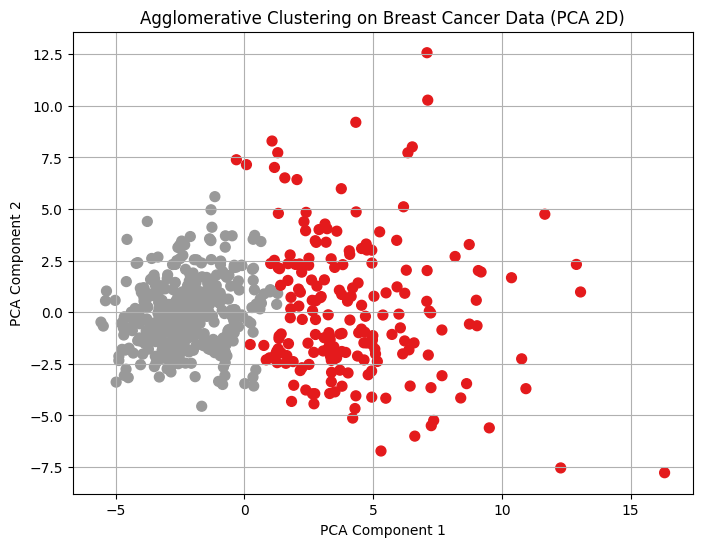

In [22]:
## Question 42:  Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.Visualize in 2D

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reduce dimensionality to 2 components using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
labels = agglo.fit_predict(X_pca)

# Step 5: Visualize the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1', s=50)
plt.title("Agglomerative Clustering on Breast Cancer Data (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


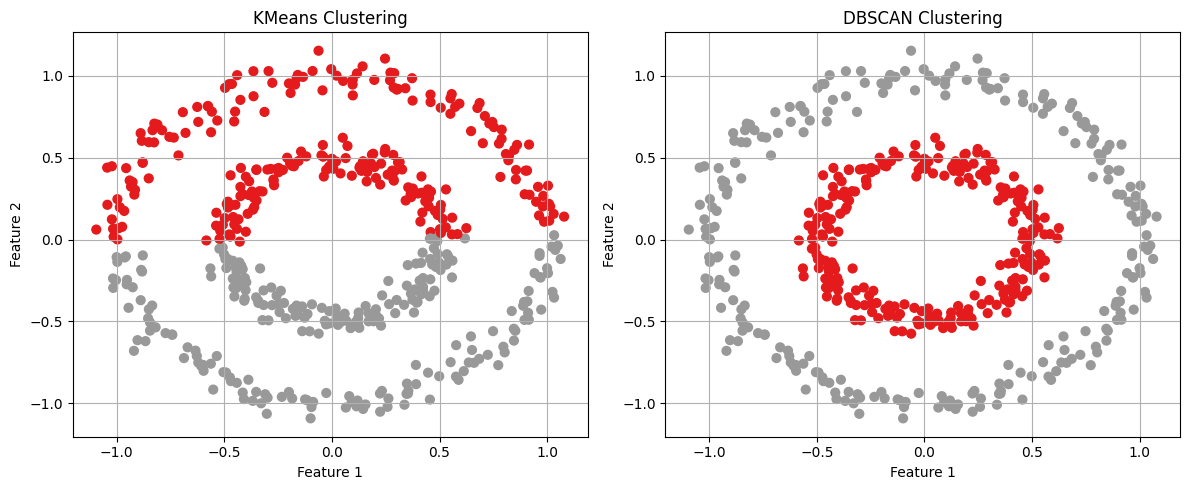

In [23]:
## Question 43: Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN

# Step 1: Generate noisy circular data
X, y_true = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Step 3: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Step 4: Plot both clustering results side-by-side
plt.figure(figsize=(12, 5))

# KMeans result
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='Set1', s=40)
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

# DBSCAN result
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='Set1', s=40)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

plt.tight_layout()
plt.show()


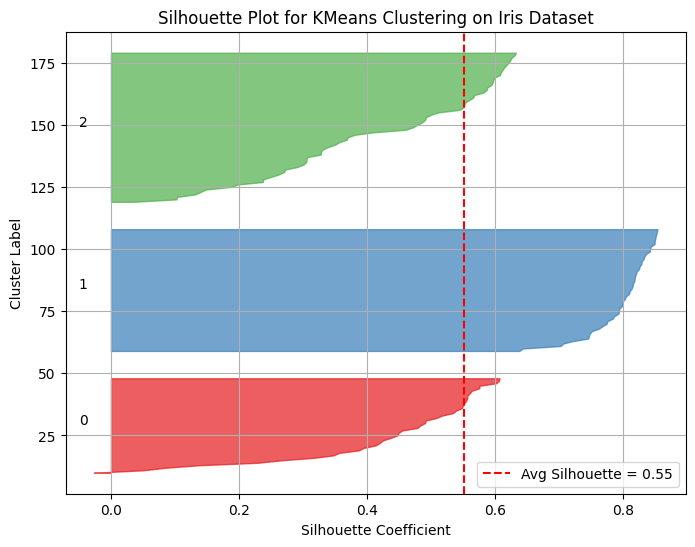

In [24]:
## Question 44: Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering


import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 2: Apply KMeans clustering (Iris has 3 natural classes)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Step 3: Compute silhouette coefficients
silhouette_vals = silhouette_samples(X, labels)
avg_score = silhouette_score(X, labels)

# Step 4: Plot silhouette coefficients for each sample
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(3):  # 3 clusters
    cluster_vals = silhouette_vals[labels == i]
    cluster_vals.sort()
    size_cluster = cluster_vals.shape[0]
    y_upper = y_lower + size_cluster
    color = plt.cm.Set1(i)
    
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10  # space between clusters

plt.axvline(avg_score, color="red", linestyle="--", label=f"Avg Silhouette = {avg_score:.2f}")
plt.title("Silhouette Plot for KMeans Clustering on Iris Dataset")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster Label")
plt.grid(True)
plt.legend()
plt.show()


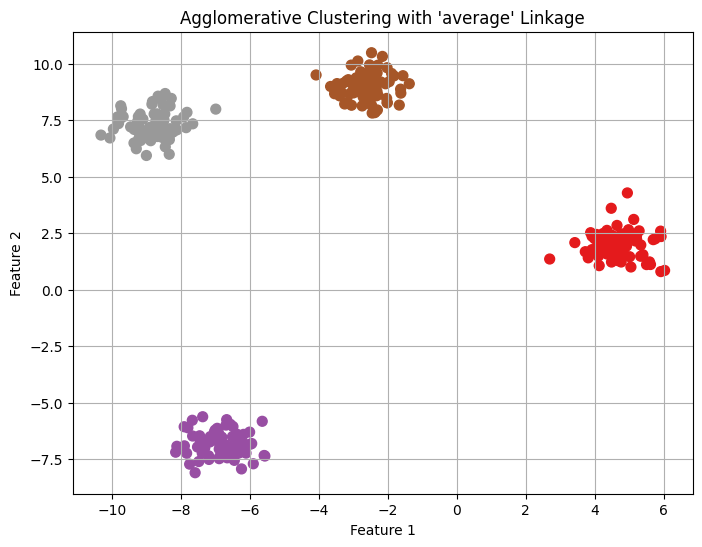

In [25]:
## Question 45: Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.Visualize clusters

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Step 2: Apply Agglomerative Clustering with 'average' linkage
agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agglo.fit_predict(X)

# Step 3: Visualize the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', s=50)
plt.title("Agglomerative Clustering with 'average' Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()



C:\Users\Sunny Gill\AppData\Local\Temp\ipykernel_9684\283114236.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_subset['Cluster'] = labels


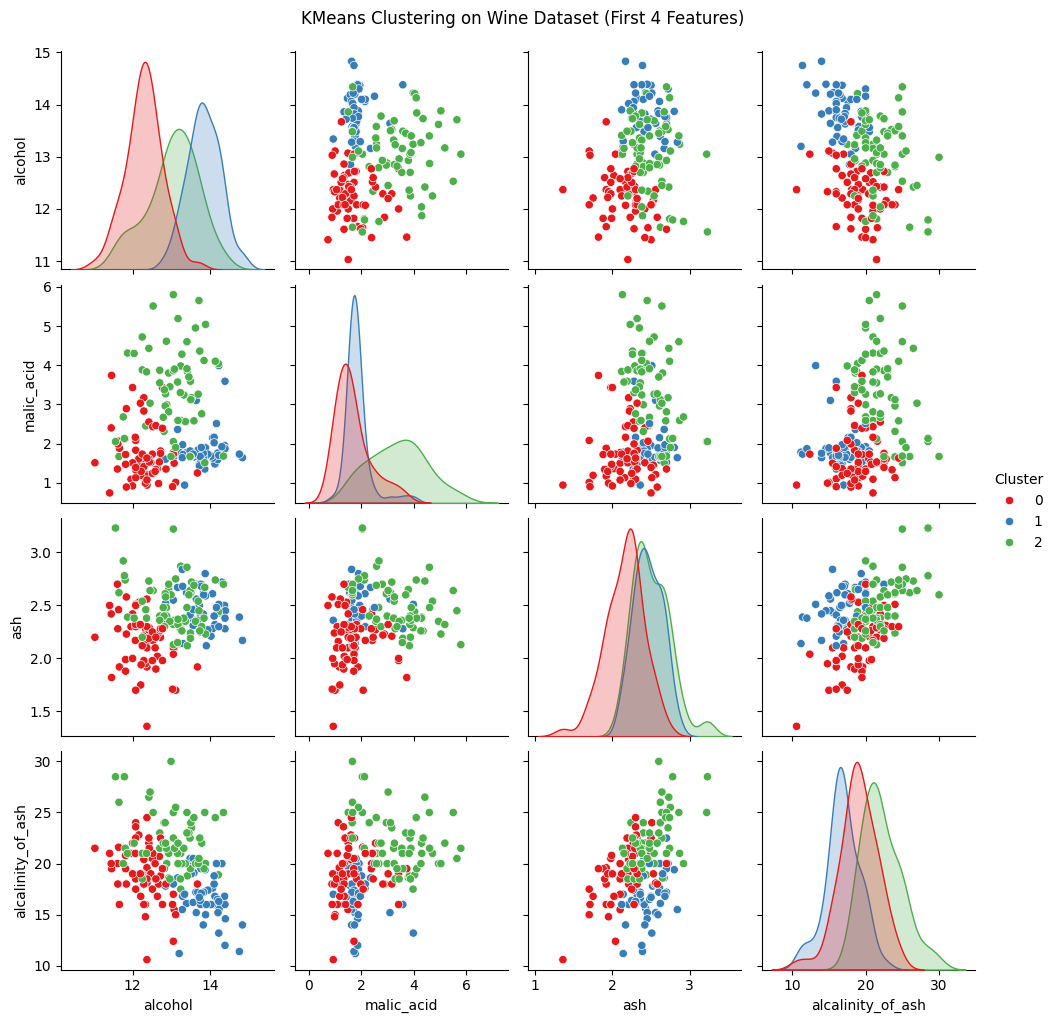

In [26]:
## Question 46:  Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
X_subset = X.iloc[:, :4]  # First 4 features

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Step 4: Add cluster labels to the DataFrame
X_subset['Cluster'] = labels

# Step 5: Visualize using seaborn pairplot
sns.pairplot(X_subset, hue='Cluster', palette='Set1', diag_kind='kde')
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.show()


In [27]:
## Question 47: Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from collections import Counter
import numpy as np

# Step 1: Generate noisy blobs
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Count clusters and noise points
label_counts = Counter(labels)
n_clusters = len([label for label in label_counts if label != -1])
n_noise = label_counts[-1]

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters found: 3
Number of noise points: 11


c:\Users\Sunny Gill\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


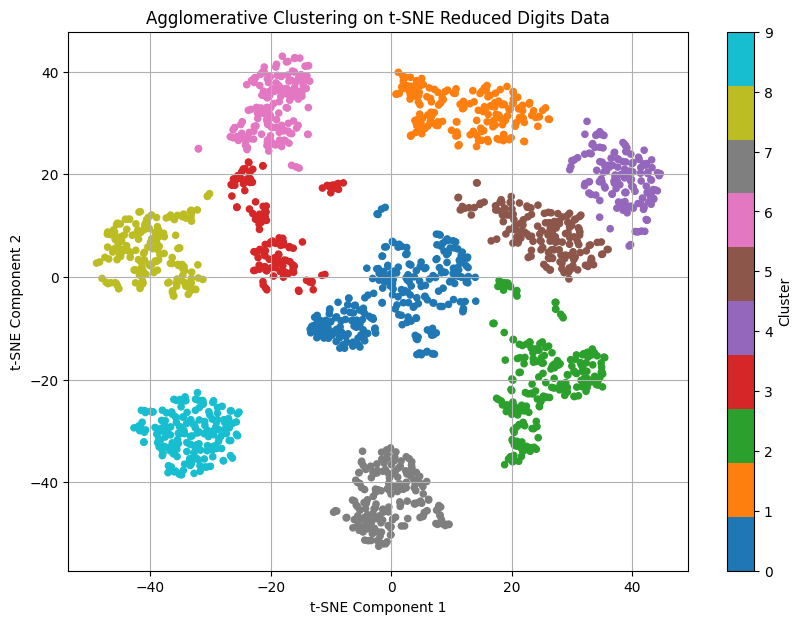

In [28]:
## Question 48:  Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Step 2: Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Step 3: Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Step 4: Apply Agglomerative Clustering (e.g., assuming 10 digit classes)
agglo = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = agglo.fit_predict(X_tsne)

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=20)
plt.title("Agglomerative Clustering on t-SNE Reduced Digits Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()
